In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_fontja

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

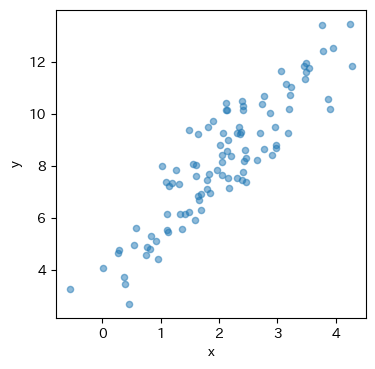

In [122]:
np.random.seed(0)
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
x2 = 2 * x1 + np.random.normal(4, 1, n_samples)  # ほぼ線形関係

fig, ax = plt.subplots(1,1,figsize=(4,4))
df2d = pd.DataFrame({"x": x1, "y": x2})
df2d.plot.scatter(x="x",y="y", alpha=0.5, ax=ax)
plt.show()

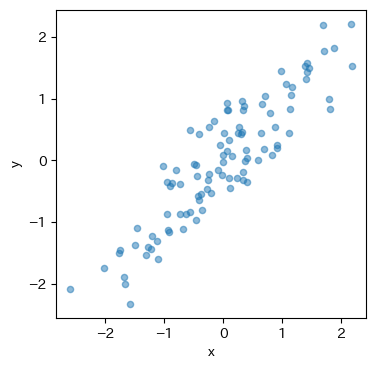

In [123]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df2d), columns=df2d.columns)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
X.plot.scatter(x="x",y="y", alpha=0.5, ax=ax)
plt.show()

,PC1,PC2
x,0.707107,0.707107
y,0.707107,-0.707107


x    0.707107
y    0.707107
Name: PC1, dtype: float64
x    0.707107
y   -0.707107
Name: PC2, dtype: float64


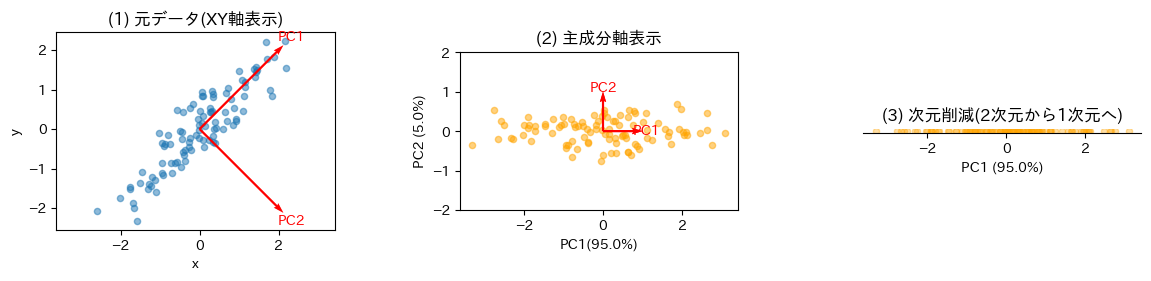

In [124]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns = ["PC1","PC2"]
)
scores = pd.DataFrame(
    X_pca,
    columns = ["xpca","ypca"]
)
explained = pd.Series(pca.explained_variance_ratio_, index=["PC1", "PC2"])

display(loadings)

v_pc1 = "%.1f" % (100 * explained["PC1"])
v_pc2 = "%.1f" % (100 * explained["PC2"])

arrow_scale = 3.0

fig, axes = plt.subplots(1,3,figsize=(14,12), sharex=True, sharey=False)
X.plot.scatter(x="x", y="y", alpha=0.5, ax=axes[0])
axes[0].set_title('(1) 元データ(XY軸表示)')

origin = np.zeros(2)
for i in range(2):
    v = loadings.iloc[:, i]
    print(v)
    axes[0].quiver(
            origin[0], origin[1],
            v.iloc[0], v.iloc[1],
            angles="xy", scale_units="xy",
            scale=1/arrow_scale, color="red", alpha=0.4
    )

origin = np.zeros(2)
arrow_scale = 3.0

for i in range(2):
    v = loadings.iloc[:, i].to_numpy()

    # 矢印の終点
    end_x = arrow_scale * v[0]
    end_y = arrow_scale * v[1]

    axes[0].quiver(
        origin[0], origin[1],
        end_x, end_y,
        angles="xy", scale_units="xy", scale=1,
        color="red"
    )

    # ラベルを矢印の先に置く
    axes[0].annotate(
        f"PC{i+1}",
        xy=(end_x, end_y),
        xytext=(1.1 * end_x, 1.1 * end_y),
        color="red",
        fontsize=10,
        ha="center",
        va="center"
    )


scores.plot.scatter(x="xpca",y="ypca", c="orange", alpha=0.5, ax=axes[1])
axes[1].set_xlabel(f"PC1({v_pc1}%)")
axes[1].set_title('(2) 主成分軸表示')
axes[1].set_ylabel(f"PC2 ({v_pc2}%)")
axes[1].set_ylim(-2,2)

# 2D用の単位ベクトル（PC1軸・PC2軸）
u = np.array([1, 0])
v = np.array([0, 1])

# 原点から矢印を描く（2D quiver）
axes[1].quiver(
    0, 0,              # 始点 (x, y)
    u[0], u[1],        # ベクトル (u, v) = PC1方向
    angles="xy", scale_units="xy", scale=1,
    color="red"
)
axes[1].quiver(
    0, 0,
    v[0], v[1],        # PC2方向
    angles="xy", scale_units="xy", scale=1,
    color="red"
)

X1 = pd.DataFrame({"xpca":scores["xpca"], "y":[0]*len(scores)})
X1.plot.scatter(x="xpca", y="y", alpha=0.35, c="orange", ax=axes[2])
#axes[2].axhline(0, c="k", linewidth=0.5)
axes[2].set_title("(3) 次元削減(2次元から1次元へ)")
axes[2].set_xlabel(f"PC1 ({v_pc1}%)")
axes[2].yaxis.set_ticks([])
axes[2].set_ylabel("")
axes[2].spines["left"].set_visible(False)
axes[2].spines["right"].set_visible(False)
axes[2].spines["top"].set_visible(False)

# PC1
axes[1].quiver(
    0, 0, 1, 0,
    angles="xy", scale_units="xy", scale=1,
    color="red"
)
axes[1].annotate(
    "PC1",
    xy=(1, 0),
    xytext=(1.1, 0),
    color="red",
    ha="center", va="center"
)

# PC2
axes[1].quiver(
    0, 0, 0, 1,
    angles="xy", scale_units="xy", scale=1,
    color="red"
)
axes[1].annotate(
    "PC2",
    xy=(0, 1),
    xytext=(0, 1.1),
    color="red",
    ha="center", va="center"
)


#plt.tight_layout()
for i in range(3):
    axes[i].set_aspect("equal", adjustable="box")
plt.subplots_adjust(wspace=0.45)

plt.savefig('images/pca1.png')
plt.show()

In [75]:
print(X.iloc[0, :])
print(X_pca[0, :])

x    1.690916
y    2.201489
Name: 0, dtype: float64
[ 2.75234617 -0.36102967]


In [ ]:
r2 = 1/np.sqrt(2)
1.690916 * r2 + 2.201489*r2


np.float64(2.7523459706244235)

Explained variance ratio: [0.54394375 0.33502308 0.12103317]
PC1+PC2 cumulative: 0.8789668329705554


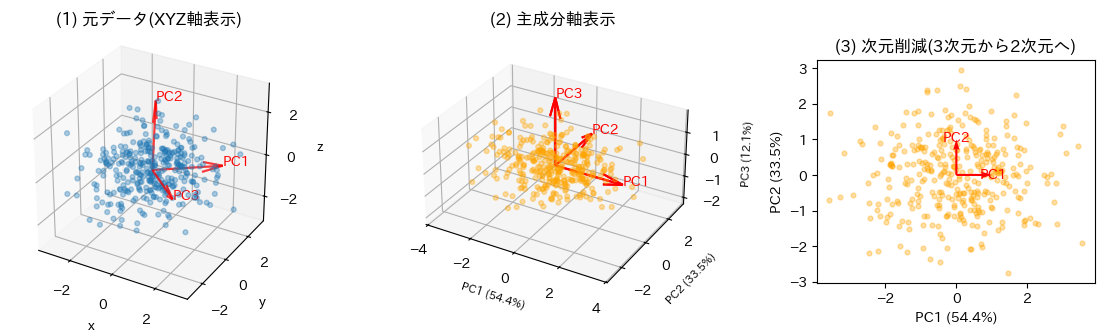

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_fontja

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (3D plot用)

# -----------------------------
# 1) データ生成（n=3, PC1+PC2 ≈ 70% を狙う）
# -----------------------------
np.random.seed(42)
n_samples = 350

# 「真の主成分空間」での分散（PC1, PC2, PC3 の分散）
# 例： [7, 5, 5] -> (7+5)/(7+5+5)=12/17≈0.7059 なので「約70%」
latent_vars = np.array([10.0, 8.0, 1.0])

# ランダムな直交行列（主成分空間→観測空間への回転）を作る
R = np.random.randn(3, 3)
Q, _ = np.linalg.qr(R)   # Qが直交行列

# 潜在変数Z（真のPC座標）を生成
Z = np.random.randn(n_samples, 3) * np.sqrt(latent_vars)

# 観測空間Xへ回転（相関のある3変数データになる）
X = Z @ Q.T

df = pd.DataFrame(X, columns=["x1", "x2", "x3"])

# -----------------------------
# 2) StandardScaler → PCA
# -----------------------------
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

pca = PCA(n_components=3)
scores = pca.fit_transform(X_std)

explained = pca.explained_variance_ratio_
cum2 = explained[:2].sum()

print("Explained variance ratio:", explained)
print("PC1+PC2 cumulative:", cum2)

# PCベクトル（元空間上の方向：各PCの係数ベクトル）
# shape: (3 features, 3 PCs)
pc_vectors = pca.components_.T

# -----------------------------
# 3) 可視化（リンク先のように2枚並べる）
# -----------------------------
fig = plt.figure(figsize=(14, 9))

# ---- 左：元空間（標準化後の x1,x2,x3 で表示すると見やすい）
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax1.scatter(X_std[:, 0], X_std[:, 1], X_std[:, 2], s=12, alpha=0.35)

ax1.set_title("(1) 元データ(XYZ軸表示)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

# PC矢印を重ねる（見栄え用にスケール）
arrow_scale = 3.0
origin = np.zeros(3)

for i in range(3):
    v = pc_vectors[:, i]
    ax1.quiver(
        origin[0], origin[1], origin[2],
        v[0], v[1], v[2],
        length=arrow_scale, normalize=True, color="red", alpha=0.5
    )

for i in range(3):
    v = pc_vectors[:, i]

    # 矢印
    ax1.quiver(
        origin[0], origin[1], origin[2],
        v[0], v[1], v[2],
        length=arrow_scale, normalize=True,
        color="red", alpha=0.5
    )

    # 矢印の終点（normalize=True なので方向だけ使われる）
    end = arrow_scale * v / np.linalg.norm(v)

    # ラベル
    ax1.text(
        end[0], end[1], end[2],
        f"PC{i+1}",
        color="red",
        fontsize=10
    )


# ---- 中央：PC空間（主成分スコア）
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax2.scatter(scores[:, 0], scores[:, 1], scores[:, 2], s=12, alpha=0.35, c="orange")

ax2.set_title("(2) 主成分軸表示")
ax2.set_xlabel(f"PC1 ({explained[0]*100:.1f}%)", size=8)
ax2.set_ylabel(f"PC2 ({explained[1]*100:.1f}%)", size=8)
ax2.set_zlabel(f"PC3 ({explained[2]*100:.1f}%)", size=8)

# PC空間の軸矢印（PC空間では軸はそのまま単位ベクトル）
# 見やすさのために同じスケールで描画
e1 = np.array([1, 0, 0])
e2 = np.array([0, 1, 0])
e3 = np.array([0, 0, 1])

for e in [e1, e2, e3]:
    ax2.quiver(
        0, 0, 0,
        e[0], e[1], e[2],
        length=arrow_scale, normalize=True, color="red"
    )

axes = [(e1, "PC1"), (e2, "PC2"), (e3, "PC3")]

for e, label in axes:
    ax2.quiver(
        0, 0, 0,
        e[0], e[1], e[2],
        length=arrow_scale, normalize=True,
        color="red"
    )

    ax2.text(
        arrow_scale * e[0],
        arrow_scale * e[1],
        arrow_scale * e[2],
        label,
        color="red",
        fontsize=10
    )

plt.subplots_adjust(wspace=0.45)

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(scores[:, 0], scores[:, 1], s=12, alpha=0.35, c="orange")
ax3.set_title("(3) 次元削減(3次元から2次元へ)")
ax3.set_xlabel(f"PC1 ({explained[0]*100:.1f}%)")
ax3.set_ylabel(f"PC2 ({explained[1]*100:.1f}%)")

# 2D用の単位ベクトル（PC1軸・PC2軸）
u = np.array([1, 0])
v = np.array([0, 1])

# 原点から矢印を描く（2D quiver）
ax3.quiver(
    0, 0,              # 始点 (x, y)
    u[0], u[1],        # ベクトル (u, v) = PC1方向
    angles="xy", scale_units="xy", scale=1,
    color="red"
)
ax3.quiver(
    0, 0,
    v[0], v[1],        # PC2方向
    angles="xy", scale_units="xy", scale=1,
    color="red"
)

ax3.text(1.05, 0, "PC1", color="red", ha="center", va="center")
ax3.text(0, 1.05, "PC2", color="red", ha="center", va="center")

# 見た目調整（矢印が見切れないように）
ax1.set_aspect("equal", adjustable="box")
ax2.set_aspect("equal", adjustable="box")
ax3.set_aspect("equal", adjustable="box")

#plt.tight_layout()
plt.show()

In [135]:
# 5つのカレールー（架空）
df = pd.DataFrame({
    "商品": ["カレーA", "カレーB", "カレーC", "カレーD", "カレーE"],
    # 属性スコア（1〜10想定）
    "辛さ": [2, 5, 9, 6, 4],
    "甘さ": [9, 6, 2, 3, 4],
    "コク": [4, 6, 5, 9, 4],
    "香り": [3, 6, 7, 4, 9],
}).set_index("商品")

df.to_clipboard()

In [142]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.copy()

# 標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA（2次元）
pca = PCA(n_components=2)
scores = pca.fit_transform(X_std)

explained = pca.explained_variance_ratio_
print(explained)

# 主成分スコア（商品＝点）
scores_df = pd.DataFrame(scores, index=df.index, columns=["PC1", "PC2"])

# 主成分負荷量（属性＝矢印の向き）
loadings_df = pd.DataFrame(pca.components_.T, index=df.columns, columns=["PC1", "PC2"])

# 寄与率
explained = pca.explained_variance_ratio_

scores_df, loadings_df, explained

[0.56723745 0.34365622]


(           PC1       PC2
 商品                      
 カレーA  2.650155  0.160287
 カレーB  0.276721  0.090689
 カレーC -1.851672 -0.505466
 カレーD -0.882660  1.937125
 カレーE -0.192545 -1.682635,
          PC1       PC2
 辛さ -0.610976  0.070199
 甘さ  0.653133  0.003319
 コク -0.271443  0.734368
 香り -0.355591 -0.675104,
 array([0.56723745, 0.34365622]))

In [139]:
explained

array([0.56723745, 0.34365622])

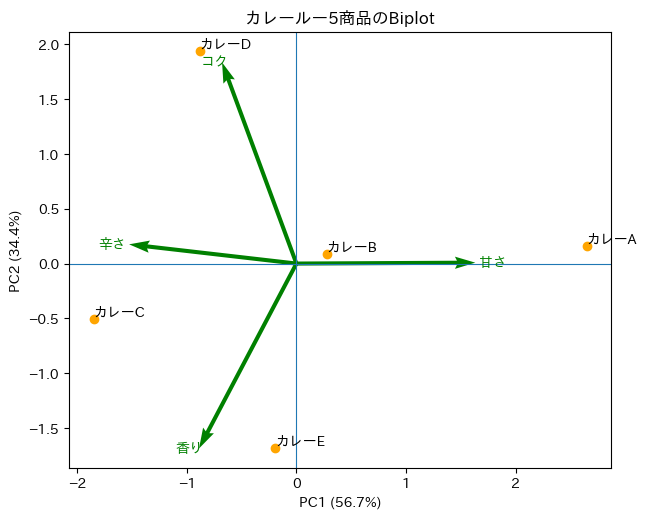

In [146]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 6))

# (A) 商品スコア（点）
ax.scatter(scores_df["PC1"], scores_df["PC2"], c="orange")

for name, (x, y) in scores_df[["PC1", "PC2"]].iterrows():
    ax.text(x, y, name, ha="left", va="bottom")

# (B) 属性ベクトル（矢印）
arrow_scale = 2.5  # 見やすさ調整（適宜）
for attr, (lx, ly) in loadings_df[["PC1", "PC2"]].iterrows():
    ax.quiver(0, 0, lx, ly, angles="xy", scale_units="xy", scale=1/arrow_scale, color="green")
    ax.text(arrow_scale*lx*1.1, arrow_scale*ly*1.0, attr, ha="center", va="center", color="green")

ax.axhline(0, linewidth=0.8)
ax.axvline(0, linewidth=0.8)

ax.set_xlabel(f"PC1 ({explained[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({explained[1]*100:.1f}%)")
ax.set_title("カレールー5商品のBiplot")

ax.set_aspect("equal", adjustable="box")
plt.savefig("images/biplot.png",dpi=150)
plt.show()

In [171]:
import pandas as pd

df_bread = pd.DataFrame({
    "商品": [
        "ダブルハード",
        "強熟",
        "元仕込",
        "ロイヤル"
    ],
    "甘さ":   [9, 1, 3, 2],
    "香り":   [1, 9, 3, 2],
    "しっとり感": [2, 2, 9, 1],
    "軽さ":   [1, 2, 1, 9]
}).set_index("商品")

df_bread.to_clipboard()

[0.42948971 0.37196217]
[0.42948971 0.37196217]


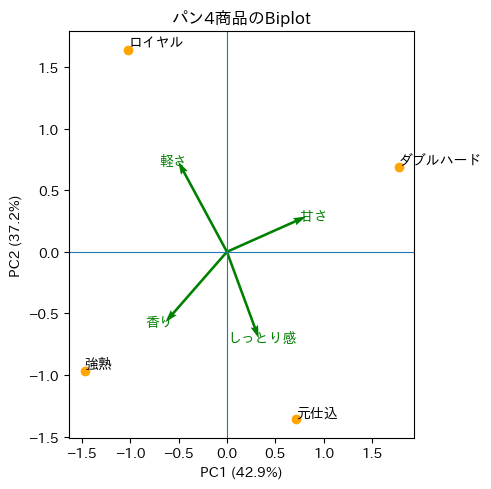

In [173]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_bread.copy()

# 標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA（2次元）
pca = PCA(n_components=2)
scores = pca.fit_transform(X_std)

explained = pca.explained_variance_ratio_
print(explained)

# 主成分スコア（商品＝点）
scores_df = pd.DataFrame(scores, index=df_bread.index, columns=["PC1", "PC2"])

# 主成分負荷量（属性＝矢印の向き）
loadings_df = pd.DataFrame(pca.components_.T, index=df_bread.columns, columns=["PC1", "PC2"])

# 寄与率
explained = pca.explained_variance_ratio_

scores_df.to_clipboard()
#loadings_df.to_clipboard()
print(explained)

fig, ax = plt.subplots(figsize=(5, 5))

# (A) 商品スコア（点）
ax.scatter(scores_df["PC1"], scores_df["PC2"], c="orange")

for name, (x, y) in scores_df[["PC1", "PC2"]].iterrows():
    ax.text(x, y, name, ha="left", va="bottom")

# (B) 属性ベクトル（矢印）
arrow_scale = 1.2  # 見やすさ調整（適宜）
for attr, (lx, ly) in loadings_df[["PC1", "PC2"]].iterrows():
    ax.quiver(0, 0, lx, ly, angles="xy", scale_units="xy", scale=1/arrow_scale, color="green")
    ax.text(arrow_scale*lx*1.1, arrow_scale*ly*1.0, attr, ha="center", va="center", color="green")

ax.axhline(0, linewidth=0.8)
ax.axvline(0, linewidth=0.8)

ax.set_xlabel(f"PC1 ({explained[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({explained[1]*100:.1f}%)")
ax.set_title("パン4商品のBiplot")

#ax.set_aspect("equal", adjustable="box")
fig.tight_layout()
plt.savefig("images/biplot_ex.png",dpi=150)
plt.show()